# Handwritten Digit Classification with MNIST

This notebook uses the MNIST dataset to train and evaluate a classification model for handwritten digits. It follows the standard data mining workflow:

- Data preprocessing
- Training a baseline model (`DummyClassifier`)
- Training a multinomial logistic regression model
- Model evaluation
- Visualization of predictions and errors


In [ ]:
# 1. Select the MNIST dataset

# /content/t10k-images.idx3-ubyte
# /content/t10k-labels.idx1-ubyte
# /content/train-images.idx3-ubyte
# /content/train-labels.idx1-ubyte

In [ ]:
# 2. Install necessary dependencies

!pip install idx2numpy


  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=bca1acae7353da8d90ddad02a2dcd9148aa472af81a54eebf595983611793744
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [ ]:
# 3. Import libraries

import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 4. Load MNIST data
train_images_path = '/content/train-images.idx3-ubyte'
train_labels_path = '/content/train-labels.idx1-ubyte'
test_images_path  = '/content/t10k-images.idx3-ubyte'
test_labels_path  = '/content/t10k-labels.idx1-ubyte'

# Load data from .idx files
X_train = idx2numpy.convert_from_file(train_images_path)
y_train = idx2numpy.convert_from_file(train_labels_path)
X_test  = idx2numpy.convert_from_file(test_images_path)
y_test  = idx2numpy.convert_from_file(test_labels_path)



In [ ]:
# 5. Processing: Flattening
#Flatten the image data for scikit-learn (28x28 → 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# 6. Baseline with DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Single predicted label: {}".format(np.unique(pred_most_frequent)))
print("Score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Single predicted label: [1]
Score: 0.11


In [ ]:
dummy_majority = DummyClassifier(strategy='most_frequent')  # Most common digit seen in training
dummy_majority.fit(X_train, y_train)

# Predict on test set
pred_most_frequent = dummy_majority.predict(X_test)

# === Evaluate ===
print("Single predicted label: {}".format(np.unique(pred_most_frequent)))
print("Score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

# Optional: full report
print("\nReporte de clasificación:\n")
print(classification_report(y_test, pred_most_frequent))

Single predicted label: [1]
Score: 0.11

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 7. Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 8. Logistic (multinomial) regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# 9. Model evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9216

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.87       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



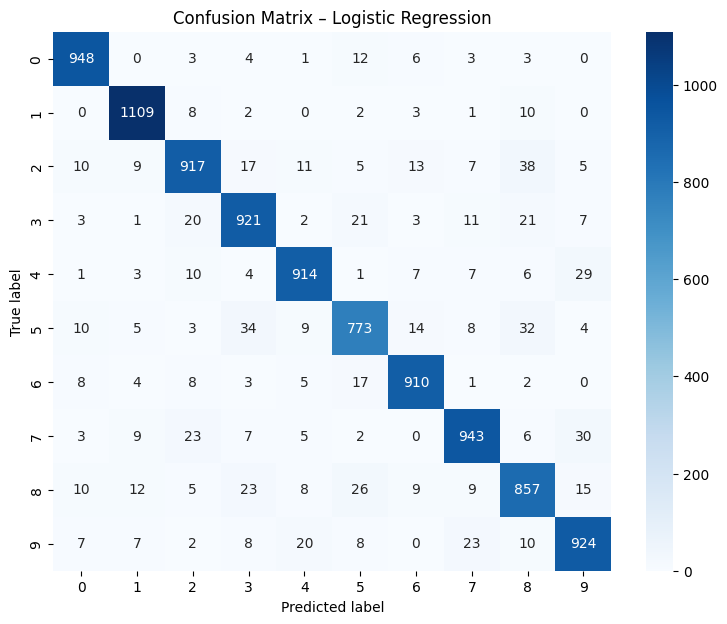

In [ ]:
# 10. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

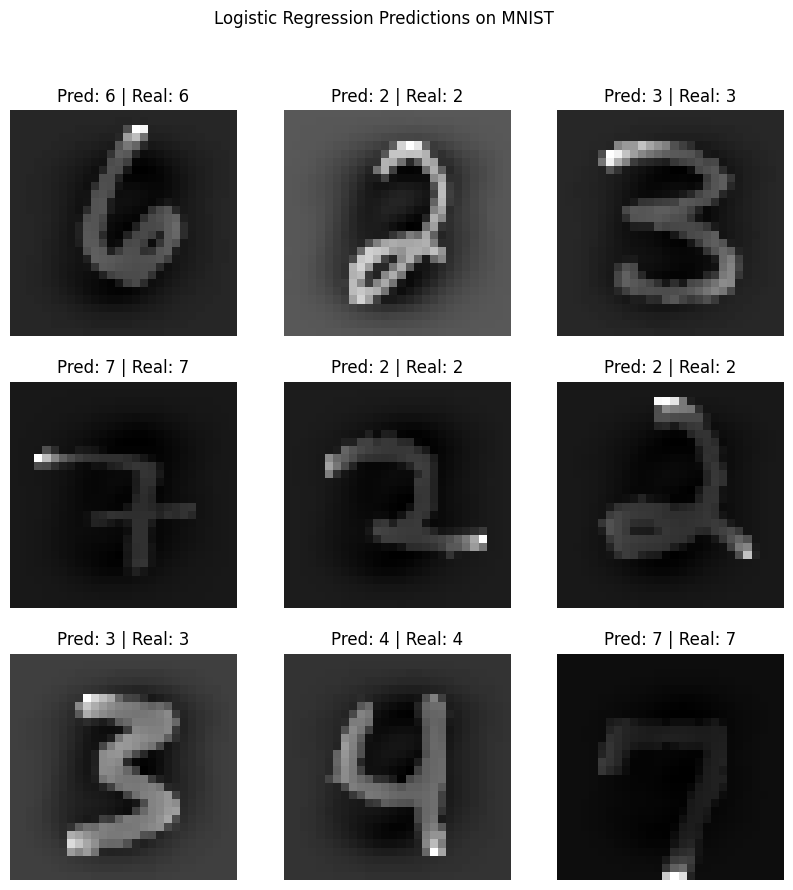

In [ ]:
# 11. Visualize some images with their prediction and actual label

import matplotlib.pyplot as plt
import numpy as np

# Select 9 images at random from the test set
np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(X_test_scaled), 9, replace=False)

# Plot
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    img = X_test_scaled[idx].reshape(28, 28)  # Convert to 2D
    pred = log_reg.predict([X_test_scaled[idx]])[0]
    real = y_test[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred} | Real: {real}")
    plt.axis('off')
plt.suptitle("Logistic Regression Predictions on MNIST")
plt.show()


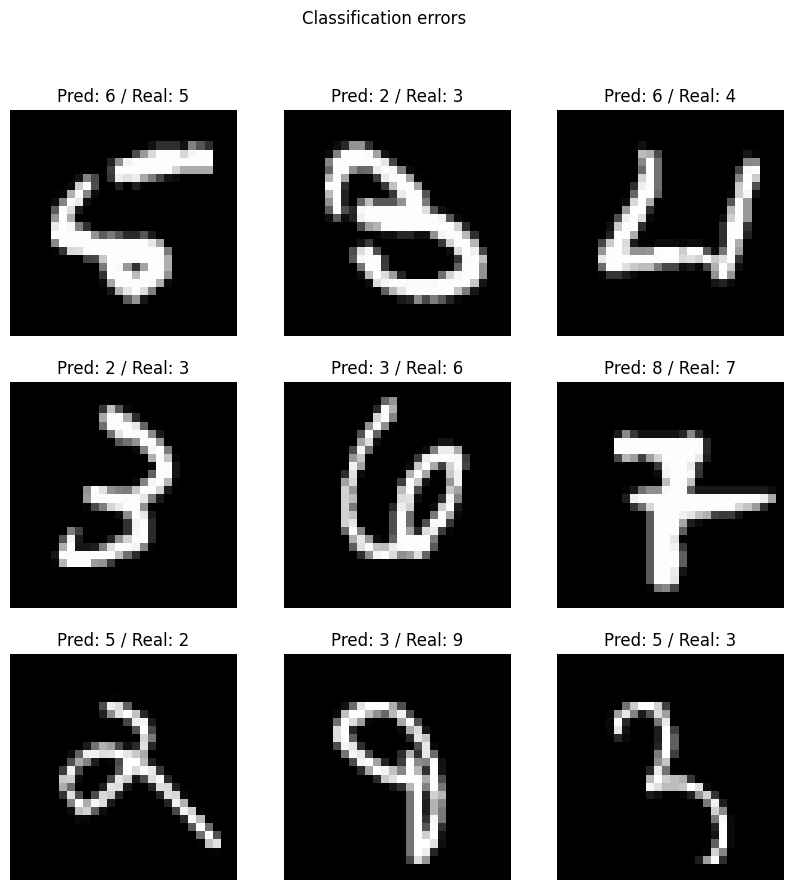

In [ ]:
# 12. Error visualization

import matplotlib.pyplot as plt

# Examples of incorrect predictions
incorrect_idx = np.where(y_pred != y_test)[0]

# Display the first 9 errors
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_idx[:9]):
    img = X_test[idx].reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Pred: {y_pred[idx]} / Real: {y_test[idx]}")
    plt.axis("off")
plt.suptitle("Classification errors")
plt.show()


## Conclusions

The logistic regression model achieved significantly better accuracy than the baseline (92% accuracy for logistic regression model).

The confusion matrix reveals that the logistic regression model performs well overall, with strong accuracy across all digit classes. Most of the diagonal cells (correct predictions) have high values, indicating the model learned to recognize the digits effectively. However, several patterns of confusion emerge:

**Digit 5** is the most frequently misclassified, often predicted as **3 (34 cases)** or **8 (32 cases)**.

**Digit 8** is sometimes confused with **5 (26 cases)** and **3 (23 cases)**.

**Digit 3** is occasionally predicted as **5 (21 cases)** and **8 (21 cases)**.

**Digit 9** is misclassified as **4 (20 cases)** and **7 (23 cases)**, which are visually similar in handwriting.

**Digit 2** shows some confusion with **3, 5, and 8**, though less significantly.

These errors typically occur between digits that have similar shapes in handwritten form, such as:
- 5 ↔ 3 ↔ 8
- 9 ↔ 4 ↔ 7

Despite these cases, the model achieves **high precision and recall on most classes**, showing that logistic regression, even as a linear model, is able to capture relevant features from flattened images when properly preprocessed.

This analysis suggests potential improvements: use of more complex models (e.g., neural networks) to capture nonlinear patterns; data augmentation to account for variability in handwriting styles.

